In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stldecompose import decompose

from sklearn.linear_model import LinearRegression

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")
data_by_month.head()

,Truck
0,39
1,41
2,57
3,61
4,54


In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')
index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
      

In [4]:
data_by_month.index=index
data_by_month

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54
...,...
2018-08-31,10
2018-09-30,27
2018-10-31,19


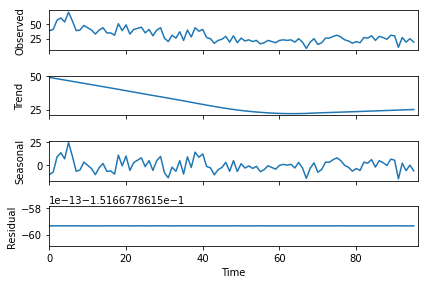

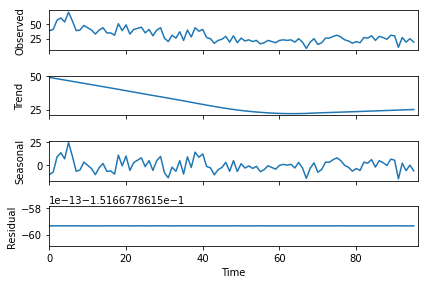

In [5]:
decomp=decompose(data_by_month['Truck'].values,period=365)
decomp.plot()

([<matplotlib.axis.XTick at 0x188aa1e3df0>,
 [Text(1, 0, '1'),
  Text(13, 0, '13'),
  Text(25, 0, '25'),
  Text(37, 0, '37'),
  Text(49, 0, '49'),
  Text(61, 0, '61'),
  Text(73, 0, '73'),
  Text(85, 0, '85')])

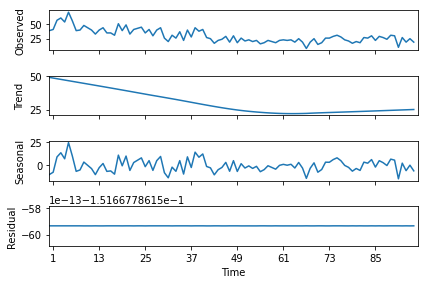

In [6]:
decomp=decompose(data_by_month['Truck'].values,period=365)
decomp.plot()

positions=np.arange(1,len(data_by_month),12)
labels=positions
plt.xticks(positions,labels)

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
decomp2=seasonal_decompose(data_by_month.Truck)

In [9]:
decomp2.seasonal

Date
2011-01-31    3.550099
2011-02-28   -0.979663
2011-03-31    5.413194
2011-04-30    1.377480
2011-05-31    2.377480
                ...   
2018-08-31   -8.289187
2018-09-30   -1.866567
2018-10-31   -1.926091
2018-11-30    0.883433
2018-12-31   -2.557044
Freq: M, Name: Truck, Length: 96, dtype: float64

In [10]:
decomp2.trend

Date
2011-01-31   NaN
2011-02-28   NaN
2011-03-31   NaN
2011-04-30   NaN
2011-05-31   NaN
              ..
2018-08-31   NaN
2018-09-30   NaN
2018-10-31   NaN
2018-11-30   NaN
2018-12-31   NaN
Freq: M, Name: Truck, Length: 96, dtype: float64

In [11]:
decomp.seasonal  #Modele feature olarak eklenebilir!!

array([-9.86020294e+00, -7.36258925e+00,  9.13437177e+00,  1.36303716e+01,
        7.12522170e+00,  2.46189206e+01,  1.01116129e+01, -6.39645023e+00,
       -4.90489245e+00,  3.58662451e+00,  7.83934070e-02, -3.42923850e+00,
       -9.93589227e+00, -2.44122379e+00,  2.05502004e+00, -6.44694248e+00,
       -5.94688147e+00, -9.44464642e+00,  1.10597788e+01, -4.33740364e-01,
        1.00746660e+01, -5.41517553e+00,  3.09654624e+00,  5.60941489e+00,
        8.12272750e+00, -1.36468552e+00,  5.14494834e+00, -5.35315935e+00,
        5.13123492e+00,  9.62966055e+00, -7.87395347e+00, -1.33761604e+01,
       -1.87363293e+00, -6.36404256e+00,  5.15359722e+00, -9.32124381e+00,
        9.20897596e+00, -2.25841605e+00,  1.42747301e+01,  8.80530915e+00,
        1.23302068e+01, -1.15227305e+00, -2.64319677e+00, -1.01445278e+01,
       -4.65886134e+00, -2.18884537e+00,  3.26294185e+00, -6.30511716e+00,
        5.10456217e+00, -6.51077574e+00,  1.84593878e+00, -2.82614629e+00,
       -5.25970224e-01, -

In [12]:
decomp.trend 

array([49.01187072, 48.51425703, 48.01729601, 47.52129623, 47.02644608,
       46.5327472 , 46.04005489, 45.54811801, 45.05656024, 44.56504327,
       44.07327438, 43.58090628, 43.08756006, 42.59289158, 42.09664775,
       41.59861027, 41.09854925, 40.5963142 , 40.09188896, 39.58540815,
       39.07700179, 38.56684332, 38.05512154, 37.5422529 , 37.02894028,
       36.51635331, 36.00671944, 35.50482713, 35.02043287, 34.52200723,
       34.02562125, 33.52782817, 33.02530072, 32.51571035, 31.99807056,
       31.4729116 , 30.94269182, 30.41008383, 29.87693764, 29.34635864,
       28.82146097, 28.30394083, 27.79486456, 27.29619562, 26.81052913,
       26.34051316, 25.88872594, 25.45678495, 25.04710562, 24.66244353,
       24.305729  , 23.97781408, 23.67763801, 23.40315049, 23.15232405,
       22.92280462, 22.71359135, 22.52428407, 22.35640687, 22.21325961,
       22.09834395, 22.01366224, 21.95994455, 21.9370995 , 21.94454746,
       21.97850061, 22.03473076, 22.10771153, 22.24463269, 22.36

In [13]:
data_by_month=pd.Series(data_by_month['Truck'].values,index=index)
data_by_month

Date
2011-01-31    39
2011-02-28    41
2011-03-31    57
2011-04-30    61
2011-05-31    54
              ..
2018-08-31    10
2018-09-30    27
2018-10-31    19
2018-11-30    25
2018-12-31    19
Freq: M, Length: 96, dtype: int64

In [14]:
type(data_by_month.index)

pandas.core.indexes.datetimes.DatetimeIndex

(<AxesSubplot:xlabel='Date'>,)

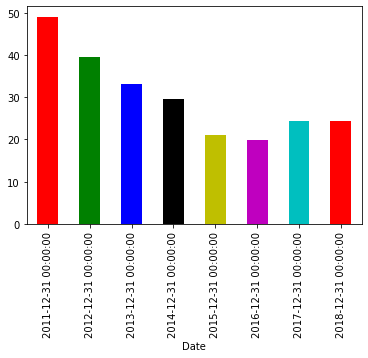

In [15]:
data_by_month.resample(rule='A').mean().plot.bar(color=list('rgbkymc')),